In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gaussian(x,mu,sigma):
    return (1.0/np.sqrt(2.0*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2.0*sigma**2))
def rectangulo(x, sigma):
    return np.where(abs(x)>=sigma, 0,0.5)
def triangulo(x,sigma):
    return np.where(abs(x)>=sigma,0, np.where(x<=0,(0.5/sigma)*(x+sigma),-(0.5/sigma)*(x-sigma)))

In [4]:
def GQ_pesos(Npoints,a, opt):
    x = np.zeros((2001))
    w = np.zeros((2001))

    m = i = j = t = t1 = pp = p1 = p2 = p3 = 0

    eps = 3.0E-14

    m = int((Npoints + 1)/2)

    for i in range(1,m+1):
        t = np.cos((np.pi*(i-0.25))/(Npoints + 0.5))
        t1 = 1
        while(abs(t-t1) >=  eps):
            p1 = 1.0
            p2 = 0.0
            for j in range(1,Npoints+1):
                p3 = p2
                p2 = p1
                p1 = ((2.0*j-1) * t * p2 - (j-1) * p3)/j
            pp = Npoints * (t * p1 -p2)/(t*t - 1.0)
            t1 = t
            t = t1 - p1/pp
        x[i-1] = -t
        x[Npoints -i] = t
        w[i-1] = 2.0/((1.0 - t*t)*pp*pp)
        w[Npoints -i] = w[i-1]
    if(opt == 1):
        for i in range(0,Npoints):
            w[i] = w[i]*2.0*a/(1.0-x[i])**2
            x[i] = a*(1.0+x[i])/(1.0-x[i])
    elif(opt == 2):
        for i in range(0,Npoints):
            w[i] = w[i]*a*(1.0+x[i]*x[i])/(1.0-x[i]*x[i])**2
            x[i] = x[i]*a/(1.0-x[i]*x[i])
    return x, w
def GQ_Int(a, eNes, fun, mu, sigma,opt):
    integral = []
    for ene in eNes:
        quadra = 0
        x, w = GQ_pesos(ene, a,opt)
        for i in range(0,ene):
            quadra += fun(x[i], mu, sigma)*w[i]
        integral.append(quadra)
    return np.array(integral)


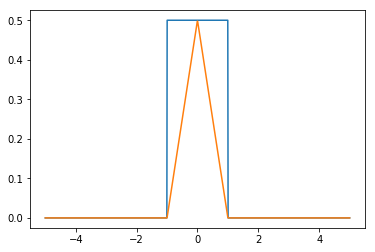

In [5]:
x = np.linspace(-5,5,1000)
plt.plot(x,rectangulo(x,1.0))
plt.plot(x,triangulo(x,1.0))

In [6]:
N = [100]

integral = GQ_Int(1,N,gaussian,0.0,1.0,2)
integral[0]

0.9999999999999607

In [7]:
def Convolutea(a, eNes, fun1, fun2, t, mu, sigma,opt):
    integral = []
    for ene in eNes:
        quadra = 0
        x, w = GQ_pesos(ene, a,opt)
        for i in range(0,ene):
            quadra += fun1(x[i], mu, sigma)*fun2(t-x[i],2.0*sigma)*w[i]
        integral.append(quadra)
    return np.array(integral)

In [8]:
N = [100]
mu = 0.0
sigma = 1.0
t = np.linspace(-10,10,1000)
convo = np.zeros(len(t))
for i in range(len(t)):
    convo[i] = Convolutea(1,N,gaussian,rectangulo,t[i],mu,sigma,2)

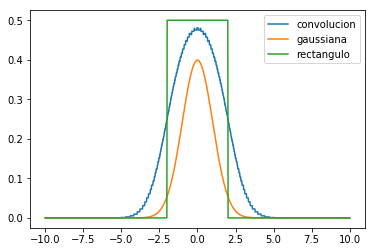

In [9]:
plt.plot(t,convo, label="convolucion")
plt.plot(t,gaussian(t,mu,sigma), label="gaussiana")
plt.plot(t,rectangulo(t,2*sigma), label="rectangulo")
plt.legend()

# Punto2

In [10]:
def sinc(x,n):
    return (np.sin(x)/x)**n
def GQ_Sinc_Int(a, eNes,n, fun,opt):
    integral = []
    for ene in eNes:
        quadra = 0
        x, w = GQ_pesos(ene, a,opt)
        for i in range(0,ene):
            quadra += fun(x[i],n)*w[i]
        integral.append(quadra)
    return np.array(integral)

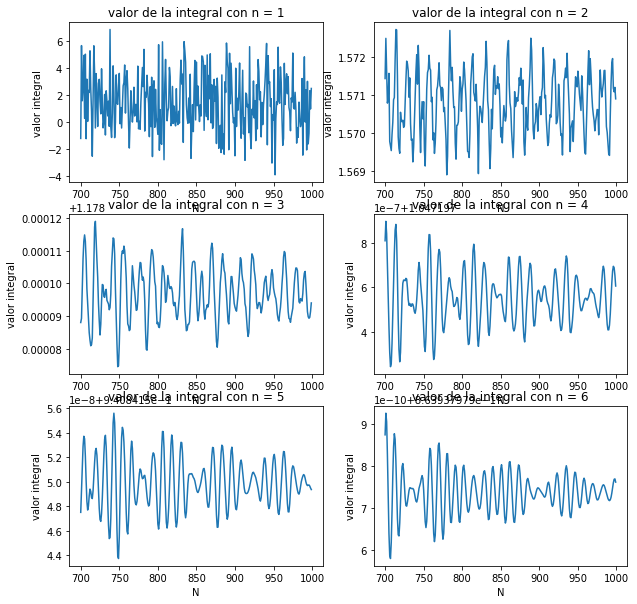

In [21]:
n = [1,2,3,4,5,6]
N = np.arange(700,1000)
cont = 1
fig = plt.figure(figsize=(10,10))
Int_n = []
for val in n:
    valores = GQ_Sinc_Int(1,N,val,sinc,1)
    Int_n.append(np.mean(valores))
    print("El valor de la integral para n = {} es: {}".format(val,Int_n[-1]))
    ax = fig.add_subplot(3,2,cont)
    ax.plot(N,valores, label="cuadratura")
    ax.set_xlabel("N")
    ax.set_ylabel("valor integral")
    ax.set_title("valor de la integral con n = {}".format(val))
    cont += 1
plt.show()

In [11]:
Integral_exacta = np.pi*np.array([0.5, 0.5, 3.0/8.0, 1.0/3.0, 115.0/385.0, 11.0/40.0])
errores = 100*np.abs(np.array(Int_n)-Integral_exacta)/Integral_exacta
errores